# Augmented Dickey-Fuller Test

데이터가 stationary 인지 아니면 non-stationary인지 빠르게 확인하는 방법중에 하나가 Dickey-Fuller Test (ADF Test) 입니다.<br>
가설은 다음과 같습니다.

| Type | Description |
|:-----|:------------|
| **Null Hypothesis (H0)** | 만약 accepted된다면, 해당 time-series data는 unit root으로 표현될수 있다. <br>즉 stationary하지 않다는 것으로 time-dependent structure를 갖고 있다. |
| **Alternate Hypothesis (H1)** | 해당 time-series 데이터는 unit root을 갖고 있지 않으며, time-dependent structure도 아니다 |


* **p-value > 0.05**: Null Hypothesis (H0)를 accept하며, unit root을 갖고 있으며, **non-stationary**입니다.
* **p-value <= 0.05**: Null Hypothesis (H0)를 reject하게 되며, uni root을 갖고 있지 않으며, **stationary** 입니다.

## Configuration

In [1]:
LAG = 12

## Import

In [2]:
%pylab inline
import math
import pandas as pd

from statsmodels import api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

from data import get_data, diff, show_diff

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Data

In [3]:
TEST_SIZE = 50

def get_temperature_data(normalize=True):
    _filename= './dataset/daily-minimum-temperatures-in-me.csv'
    dataframe = pd.Series.from_csv(_filename, header=0)
    dataframe.index = dataframe.index.to_datetime()
    dataframe = dataframe.astype('float64')
    data = dataframe.as_matrix()
    train, test = data[:-TEST_SIZE], data[-TEST_SIZE:]
    return data, train, test
    
data, train, test = get_temperature_data()

print('Train Size:', train.shape)
print('Test Size :', test.shape)

Train Size: (3600,)
Test Size : (50,)


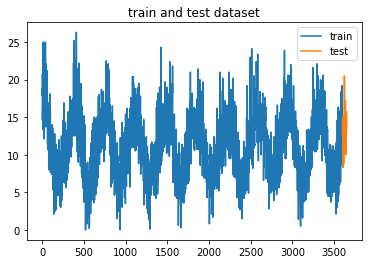

In [4]:
plot(np.arange(len(train)), train, label='train')
plot(np.arange(len(train), len(train)+len(test)), test, label='test')
legend()
title('train and test dataset')

## Dickey-Fuller Test

중요하게 볼 부분은 다음과 같습니다.

1. **test statistic**: 더 negative statistic일 수록 null hypothesis를 reject합니다. (값은 낮을 수록 좋다) 
2. **P-Value**: 0.05 이하면 null hypothesis를 reject합니다.
3. **Critical Values**: 유의수준 (level of significance)을 의미하며, 표본통계량이 기각역(rejection area)에 들어갈 확률.. 즉 오차가능성을 의미합니다. 보통 1% 또는 5%내외로 기준을 잡으며, test statistic이 critical values보다 더 낮을경우 null hypothesis을 reject를 정당화 할수 있습니다.

In [5]:
test_data = diff(train, 4)

adf = sm.tsa.stattools.adfuller(test_data)

def plot_adf_result(adf, data):
    print('statistic:', adf[0])
    print('P Value  :', adf[1])
    print('Critical Values')
    for k, v in adf[4].items():
        print(f'   {k:3}: {v:.5}')
    print('Icbest:', adf[5])
    
    
plot_adf_result(adf, test_data)

statistic: -13.9873672026
P Value  : 4.07449234689e-26
Critical Values
   1% : -3.4322
   5% : -2.8624
   10%: -2.5672
Icbest: 16768.1985362


## Hyperparameter Optimize

In [6]:
def optimize(data, n:int):
    for i in range(1, n):
        test_data = diff(data, i)
        adf = sm.tsa.stattools.adfuller(test_data)
        if adf[1] >= 0.05:
            continue
            
        c1 = adf[4]['1%']
        c5 = adf[4]['5%']
        print(f'[{i}] p-value:{adf[1]:<8.2} statistic:{adf[0]:<6.3} 1%:{c1:<.3}  5%:{c5:<.3}')
optimize(train, 10)

[1] p-value:0.0      statistic:-20.9  1%:-3.43  5%:-2.86
[2] p-value:9e-29    statistic:-15.9  1%:-3.43  5%:-2.86
[3] p-value:7.4e-26  statistic:-13.8  1%:-3.43  5%:-2.86
[4] p-value:4.1e-26  statistic:-14.0  1%:-3.43  5%:-2.86
[5] p-value:2.4e-23  statistic:-12.5  1%:-3.43  5%:-2.86
[6] p-value:1.4e-22  statistic:-12.2  1%:-3.43  5%:-2.86
[7] p-value:4.3e-24  statistic:-12.9  1%:-3.43  5%:-2.86
[8] p-value:3.2e-22  statistic:-12.0  1%:-3.43  5%:-2.86
[9] p-value:1.1e-19  statistic:-10.9  1%:-3.43  5%:-2.86


# Airline Passenger

            passenger
1949-01-01      112.0
1949-02-01      118.0
1949-03-01      132.0
1949-04-01      129.0
1949-05-01      121.0


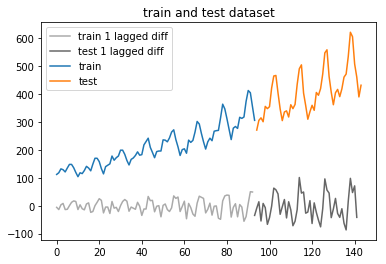

In [7]:
filename = 'dataset/international-airline-passengers.csv'
dataframe, train, test, ts_train, ts_test = get_data(filename, LAG)

train_diff = diff(train ,1)
test_diff = diff(test, 1)

# Visualization
print(dataframe.head())
show_diff(train_diff, test_diff)
plot(np.arange(len(train)), train, label='train')
plot(np.arange(len(train), len(train)+len(test)), test, label='test')
legend()
title('train and test dataset')

In [8]:
optimize(train_diff, 30)

[1] p-value:7.2e-21  statistic:-11.4  1%:-3.51  5%:-2.9
[2] p-value:2.9e-20  statistic:-11.2  1%:-3.51  5%:-2.9
[3] p-value:2.2e-08  statistic:-6.38  1%:-3.52  5%:-2.9
[4] p-value:1.1e-20  statistic:-11.3  1%:-3.51  5%:-2.9
[5] p-value:0.048    statistic:-2.88  1%:-3.52  5%:-2.9
[6] p-value:1.4e-07  statistic:-6.03  1%:-3.52  5%:-2.9
[12] p-value:4.7e-21  statistic:-11.5  1%:-3.51  5%:-2.9
[24] p-value:1.6e-16  statistic:-9.64  1%:-3.53  5%:-2.91
